In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
np.set_printoptions(precision=3, suppress=True)
mpl.style.use('dark_background')

## 0: Encode full MNIST dataset

In [2]:
# import MNIST data set with 60,000 28x28 training images
# and 10,000 28x28 testing images (y's are labels that aren't needed)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize pixel brightnesses from 0-255 -> (0,1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Have d = 28*28 = 784 as the dimensionality of the input vectors.
# Encode these vectors with dxn random matrix A, where n = 5 * d
A = np.random.randn(784,3920)

# reshape training and test data from (N, 28, 28) -> (N, 784)
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))

# rename original vectors as y_train and y_test, as these should
# be the output of the networks
y_train = x_train.copy()
y_test = x_test.copy()

# encode x_train and x_test by right-multiplying A
# x.shape = (N, d), A.shape = (d, n) -> output shape of (N, n)
x_train = x_train @ A
x_test = x_test @ A

In [4]:
# just a check to see if A is full rank
np.linalg.matrix_rank(A)

784

In [ ]:
'''
# save encoded data to .npz archive
np.savez('normally-encoded-mnist.npz', x_train=x_train,
        x_test=x_test, y_train=y_train,
        y_test=y_test, A=A)
'''

In [ ]:
'''
# import encoded data from .npz archive
with np.load('normally-encoded-mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
    y_train = data['x_train_encoded']
    y_test = data['x_test_encoded']
    A = data['A']
'''

## 1:  Full-size (28x28) MNIST dataset

### 1.1: Large, nonlinear network to overfit a subset of the data
#### Results - Unlike previous attempts, the network successfully converges to the original images. This network is larger than before, and also used the SGD as the optimizer instead of Adam. Was able to get it to discriminate up to a subset of size 100, but trying 1000 gave the same superimposed result as before.

In [5]:
# deep, nonlinear network with MeanSquaredError
model11 = tf.keras.Sequential([
    tf.keras.layers.Dense(2000, activation='relu',
                          input_shape=(3920,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(784)
])
loss_fn = tf.keras.losses.MeanSquaredError()
model11.compile(tf.keras.optimizers.SGD(),
             loss=loss_fn)

In [16]:
# training
subset_size = 100
history = model11.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=3000, verbose=0)

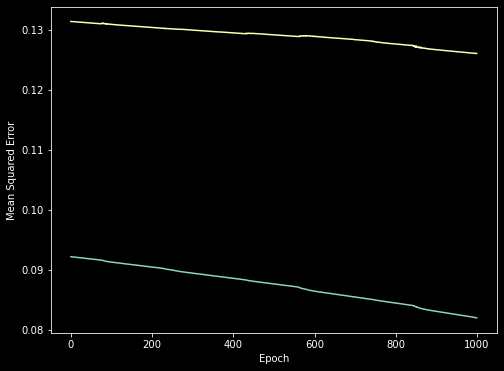

In [17]:
# plot loss history
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
plt.show()

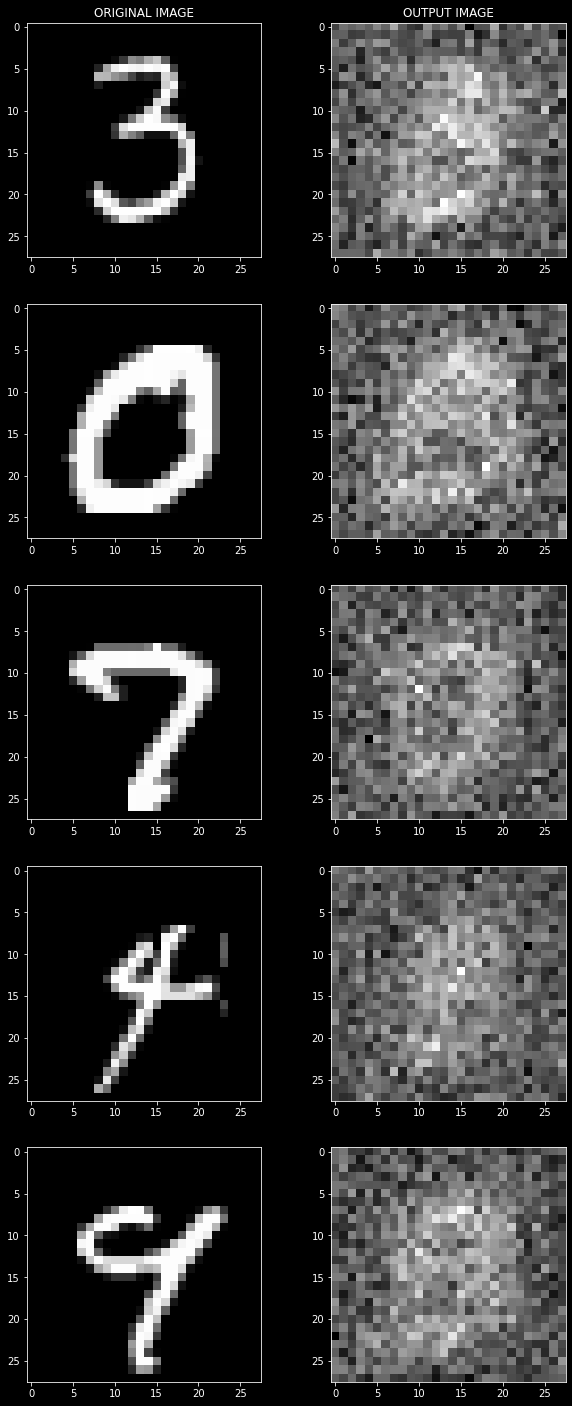

In [18]:
# plot one column with original images and one column with the
# network's output
nrows = 5 # how many pairs of images to show
start_idx = 50 # where in the datasets to slice examples
fig, axs = plt.subplots(nrows,2,figsize=(10,nrows*5))
original_images = np.reshape(y_train[start_idx:start_idx+nrows,:],
                             (nrows,28,28))
output_images = np.reshape(model11(x_train[start_idx:start_idx+nrows,:]), 
                           (nrows,28,28))

axs[0,0].set_title('ORIGINAL IMAGE')
axs[0,1].set_title('OUTPUT IMAGE')
for i in range(nrows):
    axs[i,0].imshow(original_images[i,:,:],
                    cmap='gray')
    axs[i,1].imshow(output_images[i,:,:],
                    cmap='gray')

### 1.2: Smaller nonlinear model on similar subset of data to experiment with learning rates.
#### Results - It seems like having a learning rate higher than ~0.6 causes problems, as the output loss becomes NaN after the first epoch and all the weights go to NaN as well. Other than that, it doesn't seem to make a huge difference

In [17]:
loss_fn = tf.keras.losses.MeanSquaredError()

# try learning rate of 0.0001
model120 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model120.compile(tf.keras.optimizers.SGD(learning_rate=0.0001),
             loss=loss_fn)

# learning rate of 0.0005
model121 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model121.compile(tf.keras.optimizers.SGD(learning_rate=0.0005),
             loss=loss_fn)

# try learning rate of 0.001
model122 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model122.compile(tf.keras.optimizers.SGD(learning_rate=0.001),
             loss=loss_fn)

# try learning rate of 0.005
model123 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model123.compile(tf.keras.optimizers.SGD(learning_rate=0.005),
             loss=loss_fn)


In [26]:
subset_size = 1000
print('Learning rate=0.0001')
history0 = model120.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.0005')
history1 = model121.fit(x_train[:subset_size], 
            y_train[:subset_size],
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.001')
history2 = model122.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.005')
history3 = model123.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)

Learning rate=0.0001
Epoch 1/100
90/90 - 2s - loss: 0.4484 - val_loss: 0.5791
Epoch 2/100
90/90 - 2s - loss: 0.4340 - val_loss: 0.5636
Epoch 3/100
90/90 - 2s - loss: 0.4205 - val_loss: 0.5491
Epoch 4/100
90/90 - 2s - loss: 0.4080 - val_loss: 0.5356
Epoch 5/100
90/90 - 2s - loss: 0.3964 - val_loss: 0.5229
Epoch 6/100
90/90 - 2s - loss: 0.3854 - val_loss: 0.5110
Epoch 7/100
90/90 - 2s - loss: 0.3752 - val_loss: 0.4998
Epoch 8/100
90/90 - 2s - loss: 0.3656 - val_loss: 0.4892
Epoch 9/100
90/90 - 2s - loss: 0.3566 - val_loss: 0.4792
Epoch 10/100
90/90 - 2s - loss: 0.3481 - val_loss: 0.4698
Epoch 11/100
90/90 - 2s - loss: 0.3400 - val_loss: 0.4609
Epoch 12/100
90/90 - 2s - loss: 0.3325 - val_loss: 0.4525
Epoch 13/100
90/90 - 2s - loss: 0.3253 - val_loss: 0.4445
Epoch 14/100
90/90 - 2s - loss: 0.3185 - val_loss: 0.4369
Epoch 15/100
90/90 - 2s - loss: 0.3121 - val_loss: 0.4297
Epoch 16/100
90/90 - 2s - loss: 0.3060 - val_loss: 0.4228
Epoch 17/100
90/90 - 2s - loss: 0.3002 - val_loss: 0.4163
Ep

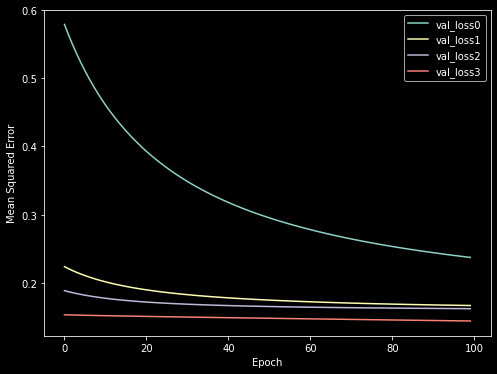

In [27]:
# plot loss history
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(history0.history['val_loss'], label='val_loss0')
ax.plot(history1.history['val_loss'], label='val_loss1')
ax.plot(history2.history['val_loss'], label='val_loss2')
ax.plot(history3.history['val_loss'], label='val_loss3')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend()
plt.show()

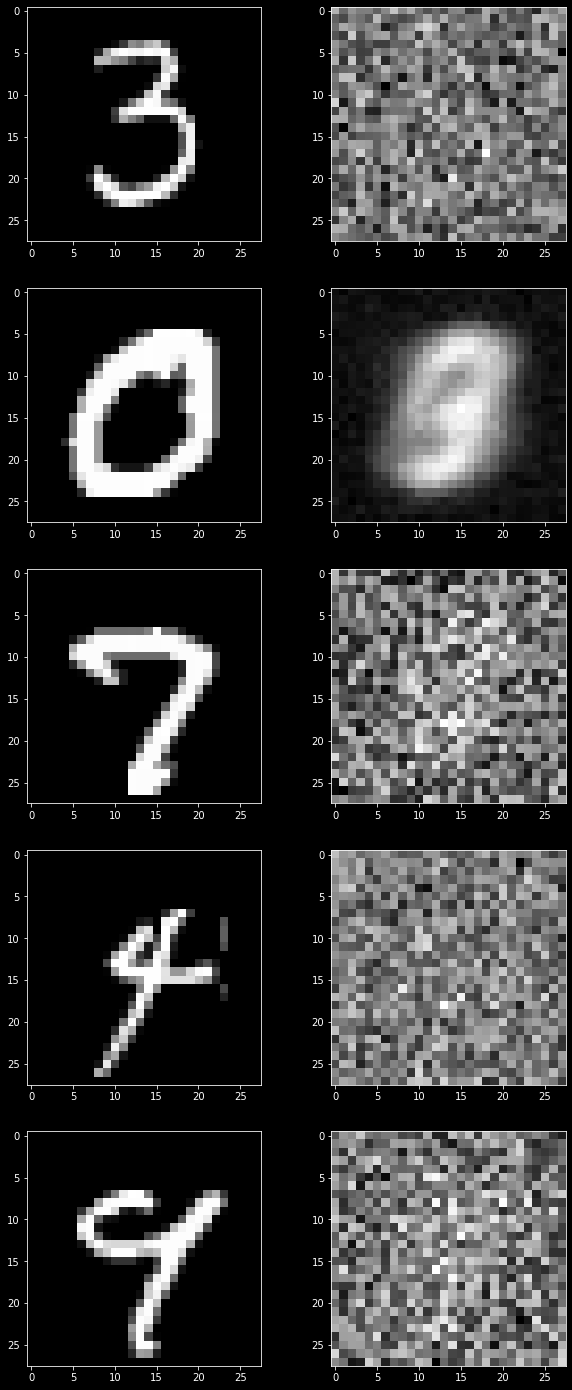

In [30]:
# plot one column with original images and one column with the
# network's output
nrows = 5 # how many pairs of images to show
start_idx = 50 # where in the datasets to slice examples
fig, axs = plt.subplots(nrows,2,figsize=(10,nrows*5))
original_images = np.reshape(y_train[start_idx:start_idx+nrows,:],
                             (nrows,28,28))
output_images = np.reshape(model121(x_train[start_idx:start_idx+nrows,:]), 
                           (nrows,28,28))

axs[0,0].set_title('ORIGINAL IMAGE')
axs[0,1].set_title('OUTPUT IMAGE')
for i in range(nrows):
    axs[i,0].imshow(original_images[i,:,:],
                    cmap='gray')
    axs[i,1].imshow(output_images[i,:,:],
                    cmap='gray')

## 2: Cropped (central 20x20 pixels) MNIST dataset
#### The hypothesis here is that the model on the 5x5 cropped images worked because the activation wasn't concentrated in the center (which still corresponds to a static location in the flattened vector as well), not because the size of the image is important. I think that's the reason the superposition solution is reached, that the network learns to ignore certain pixels (which I guess could be checked by looking at the weight matrix manually). I'm just using the cropped image here because using random input vectors would mean solely relying on the test loss as the only metric, as opposed to being able to judge by eye as well.

### 2.1: Encode cropped MNIST dataset

### 2.2: Nonlinear neural-network with two hidden layers

## 3: Try adding noise to the encoded data